In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
df = pd.read_csv('Project1BestData.csv')
df.head()

,Unnamed: 0,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
0,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,37,4,2017-04-29 04:00:00
1,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,33,34,2017-04-29 08:00:00
2,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,153,100,2017-04-29 12:00:00
3,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,249,76,2017-04-29 16:00:00
4,5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,309,60,2017-04-29 20:00:00


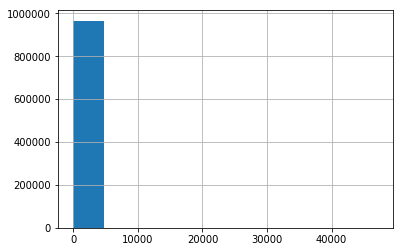

In [4]:
df.ENTRIES.hist();

In [5]:
#adding column TOTAL_TRAFFIC by adding ENTRIES and EXITS
df['TOTAL_TRAFFIC'] = df['ENTRIES'] + df['EXITS']

In [6]:
#adding column to take datetime and output weekday name such as Monday, Tuesday, Wednesday, etc. 
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " +df.TIME, format="%m/%d/%Y %H:%M:%S")
df['day_of_week'] = df['DATE_TIME'].dt.weekday_name

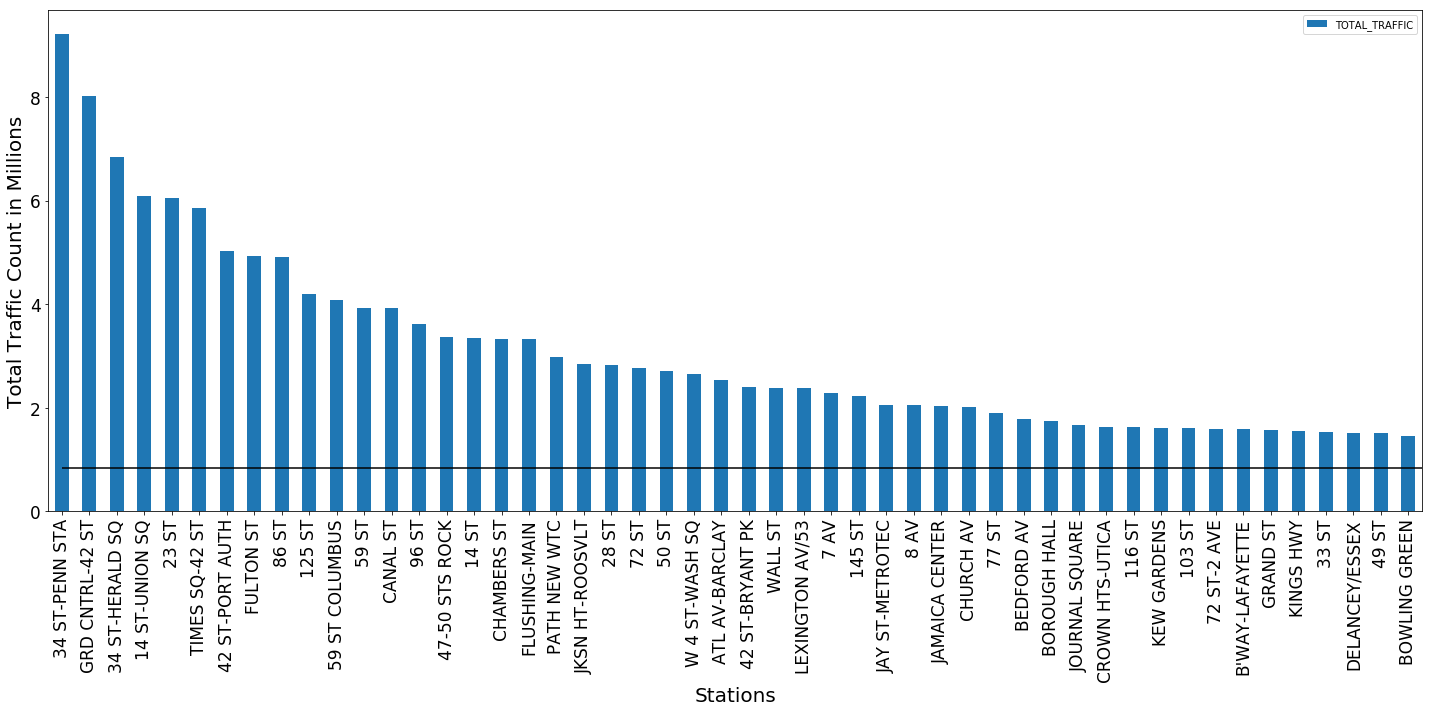

In [7]:
#creating top 50 stations graph
stations = df.groupby(["STATION"]).agg({'TOTAL_TRAFFIC': 'sum'})

top_50 = stations.sort_values('TOTAL_TRAFFIC', ascending = False).head(50)
top_50_M = top_50/1000000
ax = top_50_M.plot.bar(figsize=(20,10))

#adding in line with the mean traffic count of all stations
plt.hlines(.83428501599999995, 0, 50)

ax.set_ylabel("Total Traffic Count in Millions", fontsize = 20)
ax.set_xlabel("Stations", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize= 17)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('top_50_stations_3.png')

In [8]:
stations['TOTAL_TRAFFIC'].mean()

834285.01599999995

In [9]:
#looking at top stations for Saturday traffic
saturday = df[df["day_of_week"] == "Saturday"].groupby(["STATION"]).agg({'TOTAL_TRAFFIC': 'sum'}).sort_values('TOTAL_TRAFFIC', ascending = False)
saturday.head()

,TOTAL_TRAFFIC
STATION,
34 ST-PENN STA,816408
14 ST-UNION SQ,661173
34 ST-HERALD SQ,653583
TIMES SQ-42 ST,627136
42 ST-PORT AUTH,562049


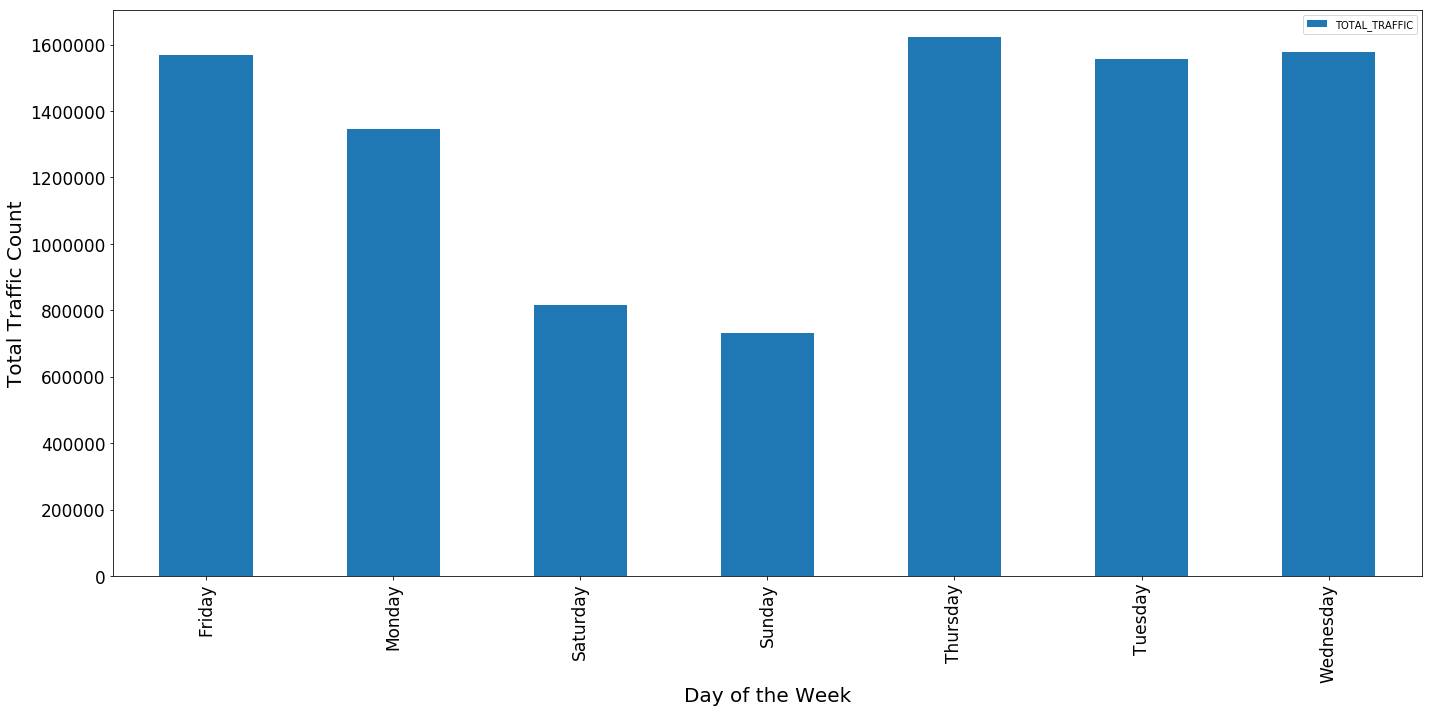

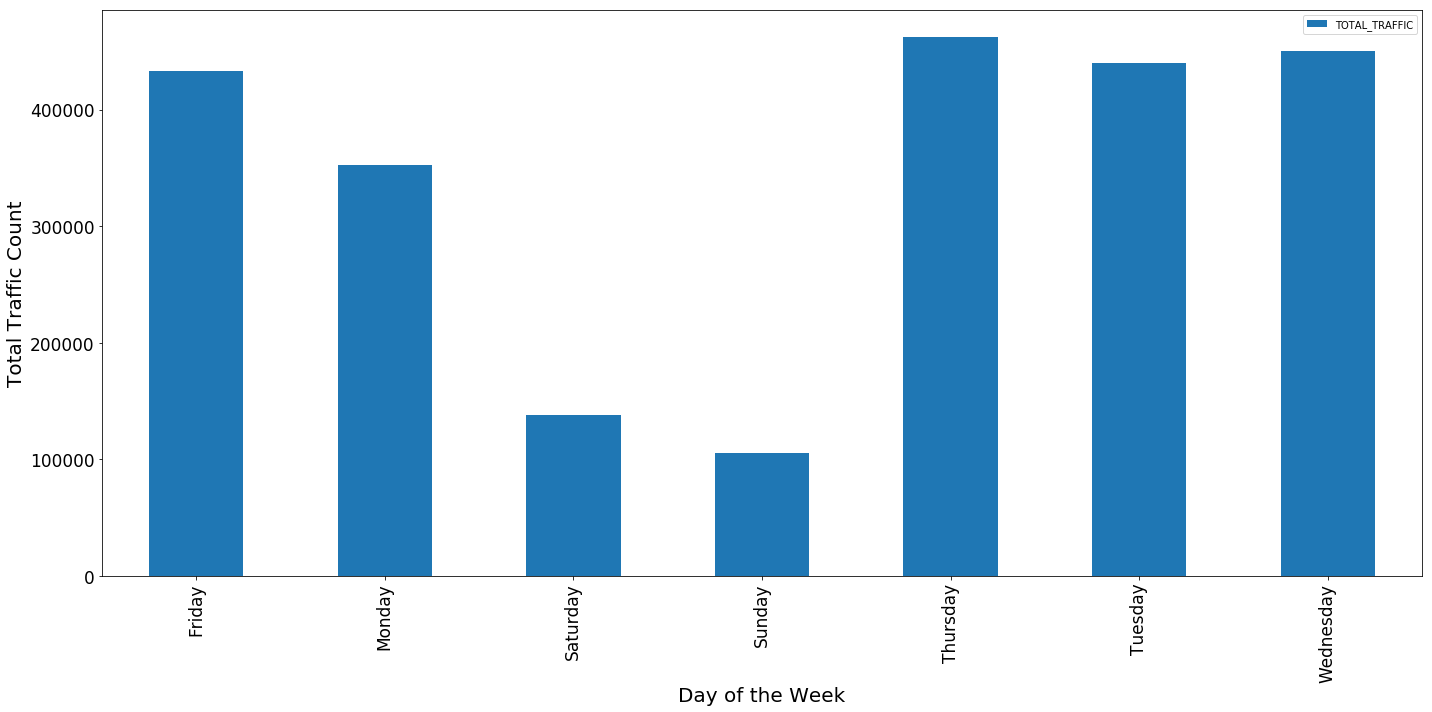

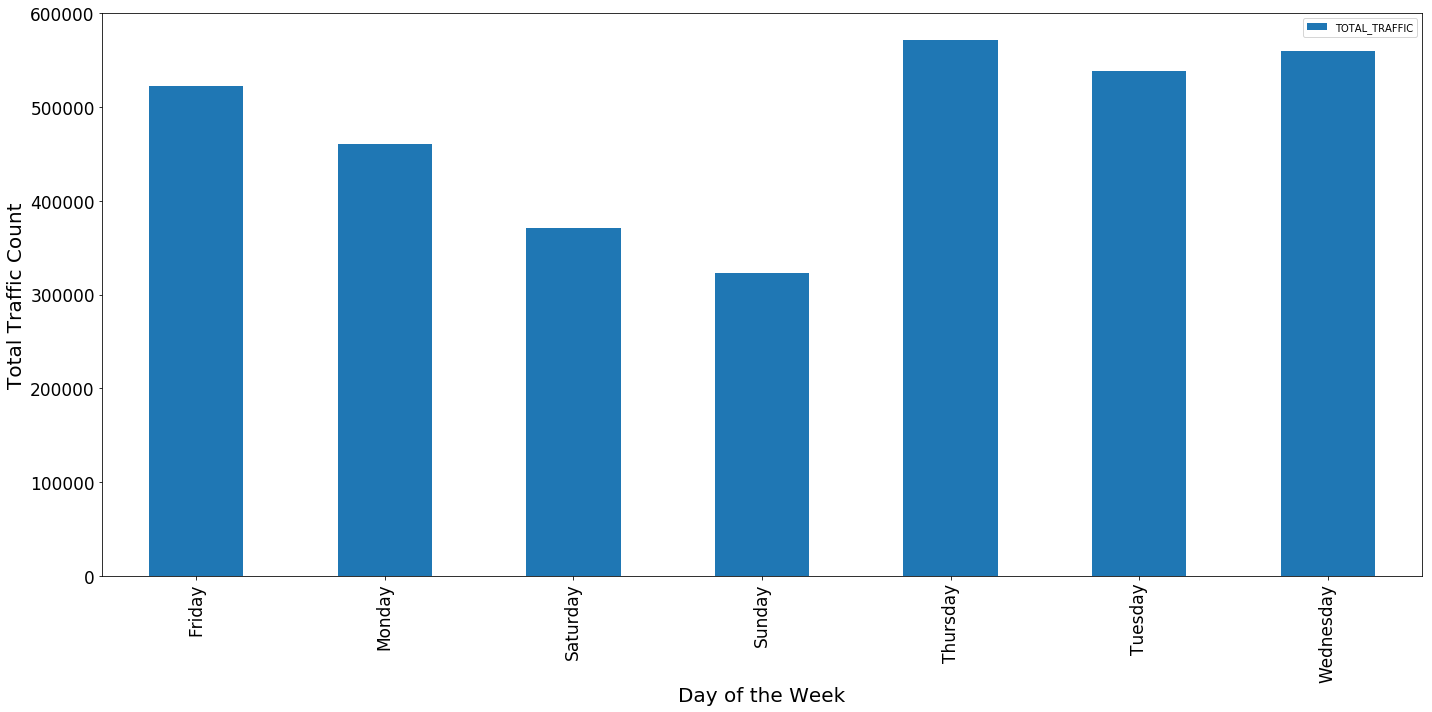

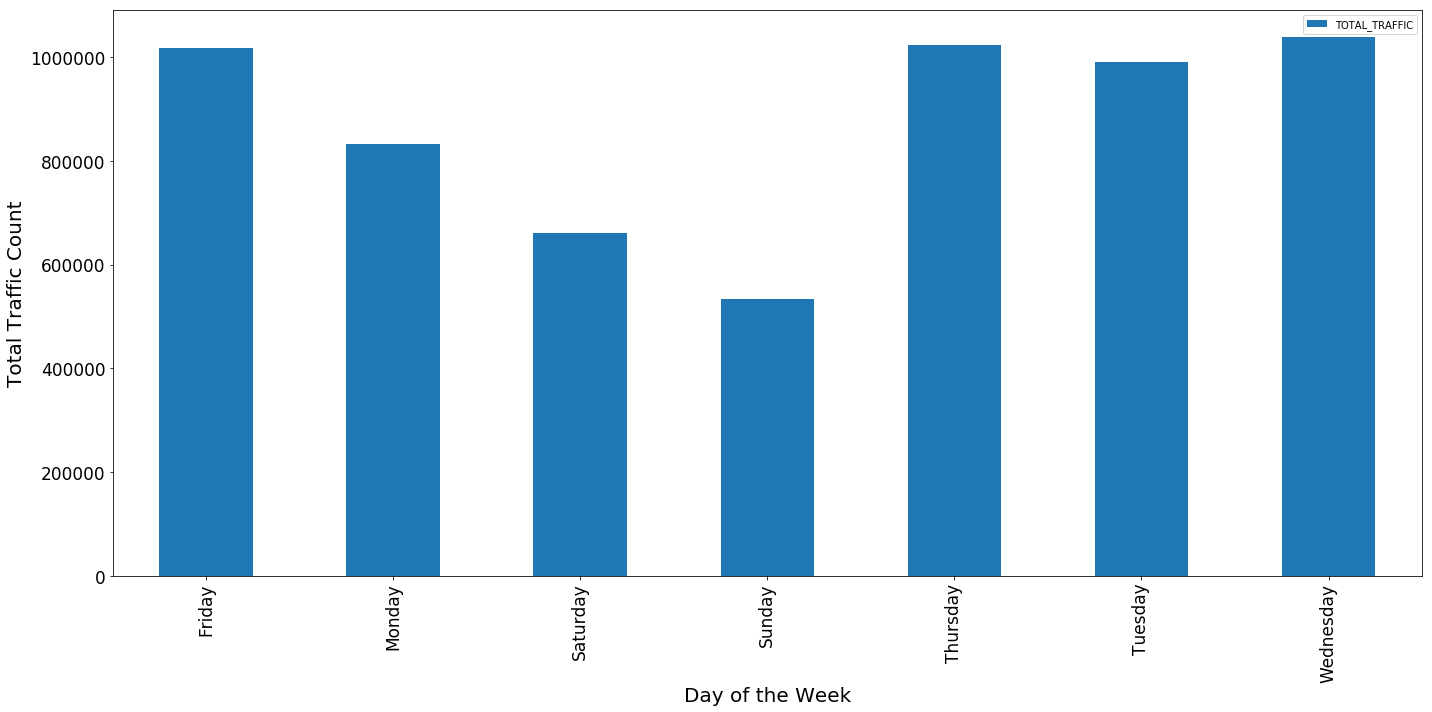

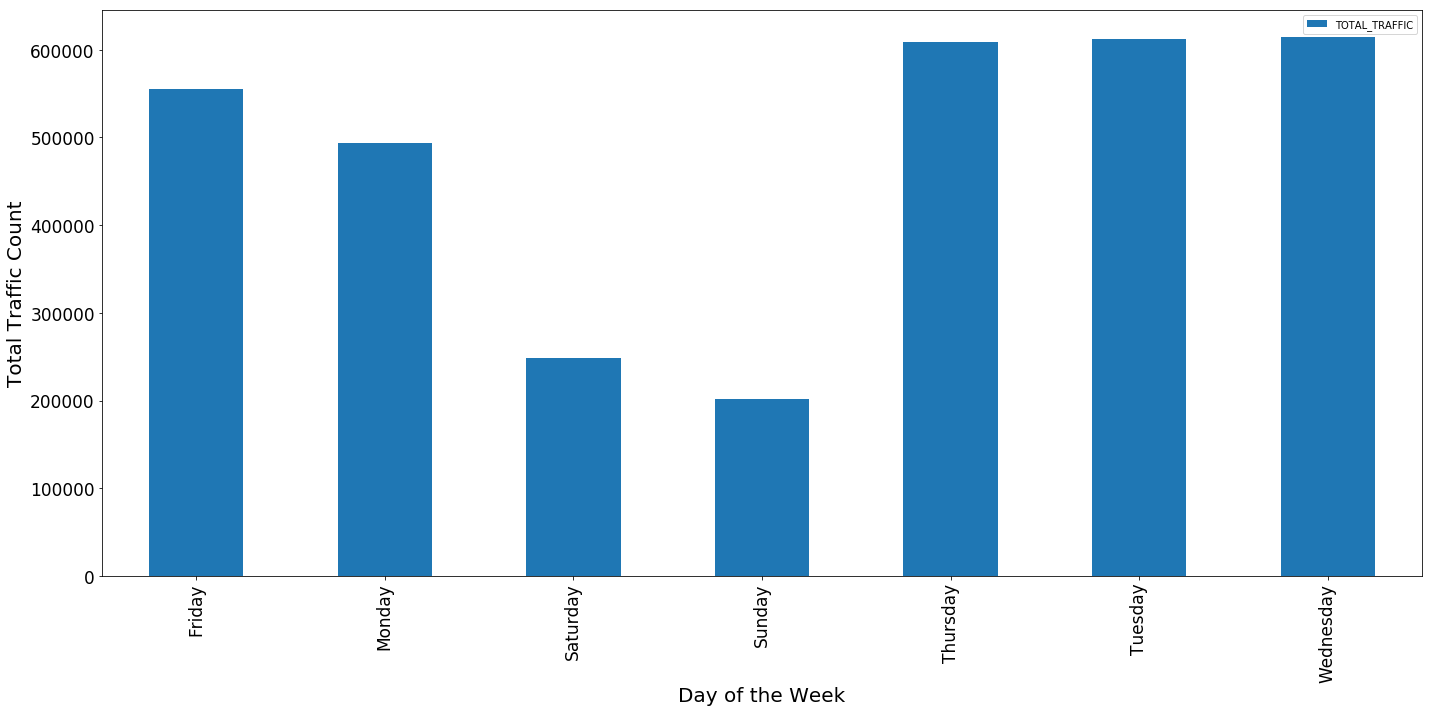

In [10]:
#creating day of the week charts for stations of interest
stations_of_interest = ['34 ST-PENN STA', 'LEXINGTON AV/53', '14 ST', '14 ST-UNION SQ', 'CHAMBERS ST']
for station in stations_of_interest:
    station_df = df[df["STATION"] == station]
    station_dow = station_df.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
    ax = station_dow.plot.bar(figsize=(20,10))
    
    ax.set_ylabel("Total Traffic Count", fontsize = 20)
    ax.set_xlabel("Day of the Week", fontsize = 20)
    ax.tick_params(axis = "both", which = "major", labelsize= 17)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(''.join((''.join(station.split( )).split('/')))+'.png')


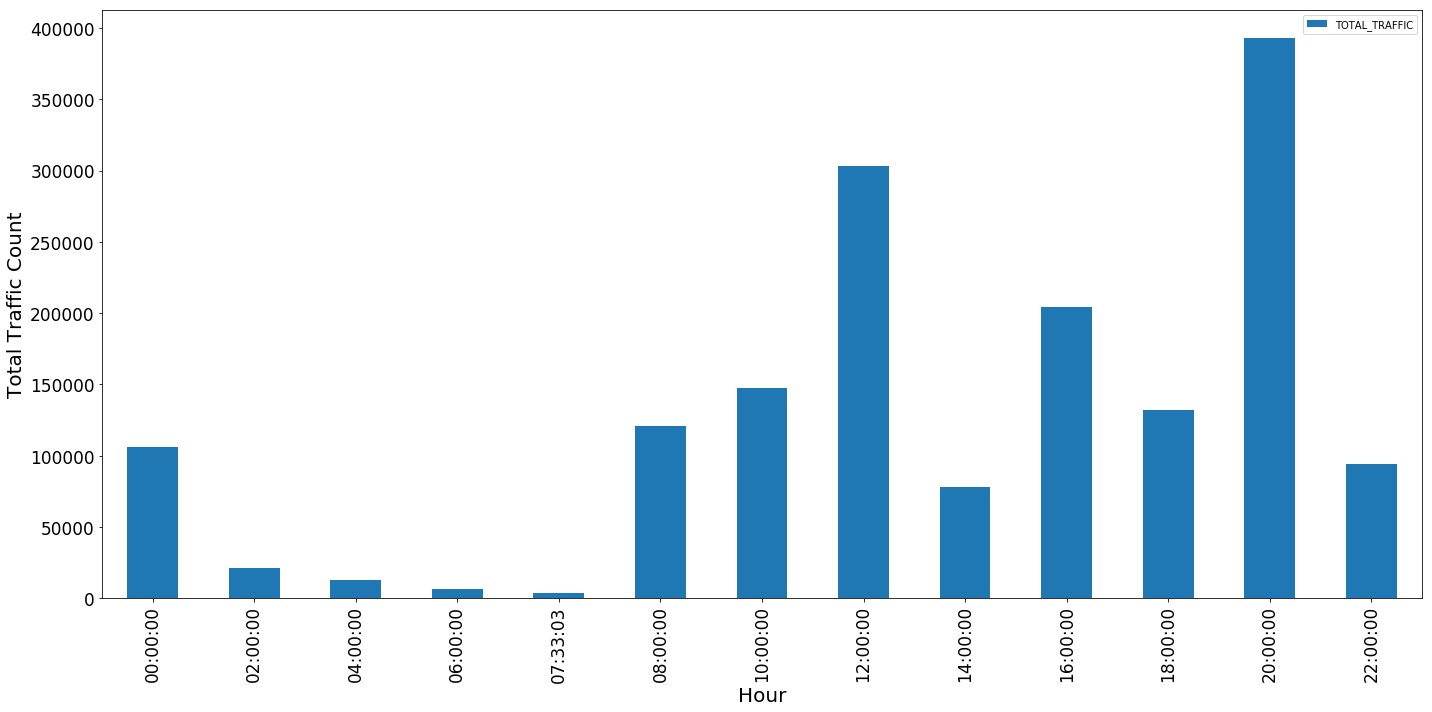

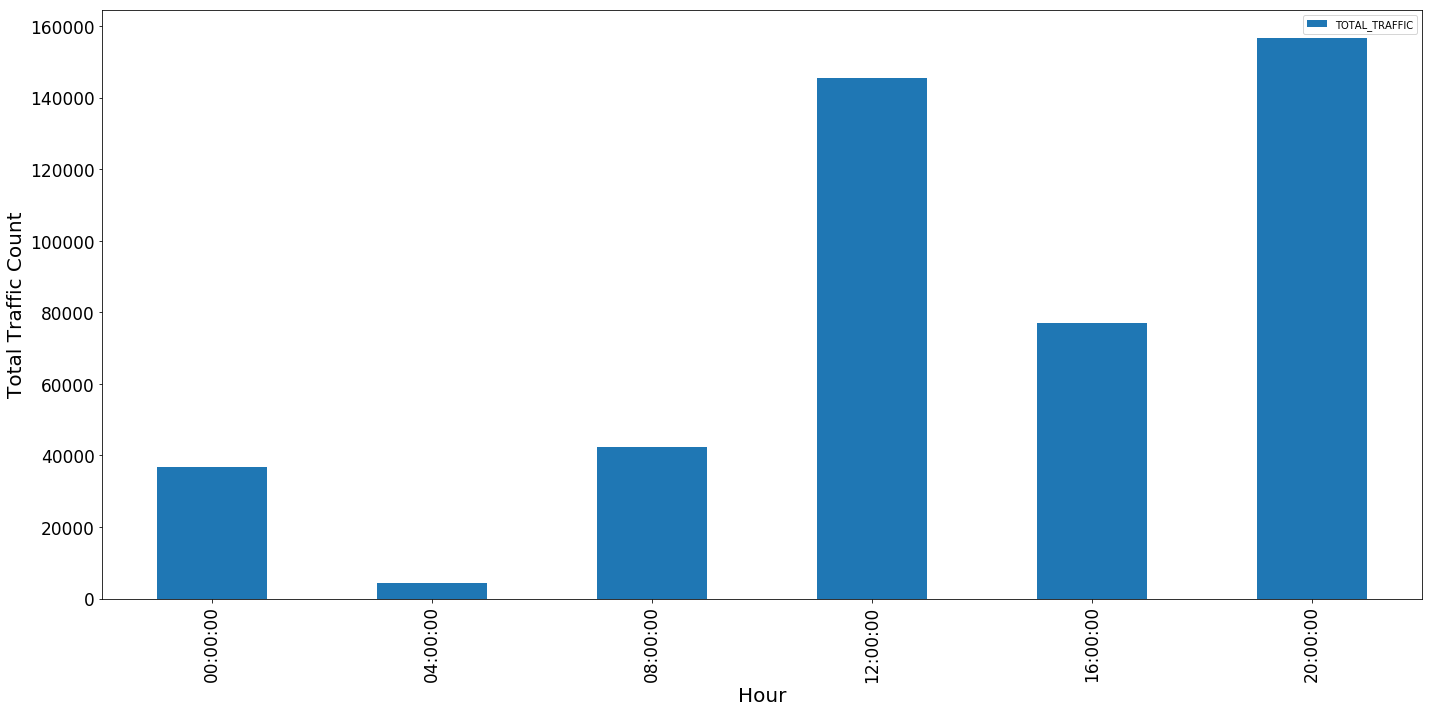

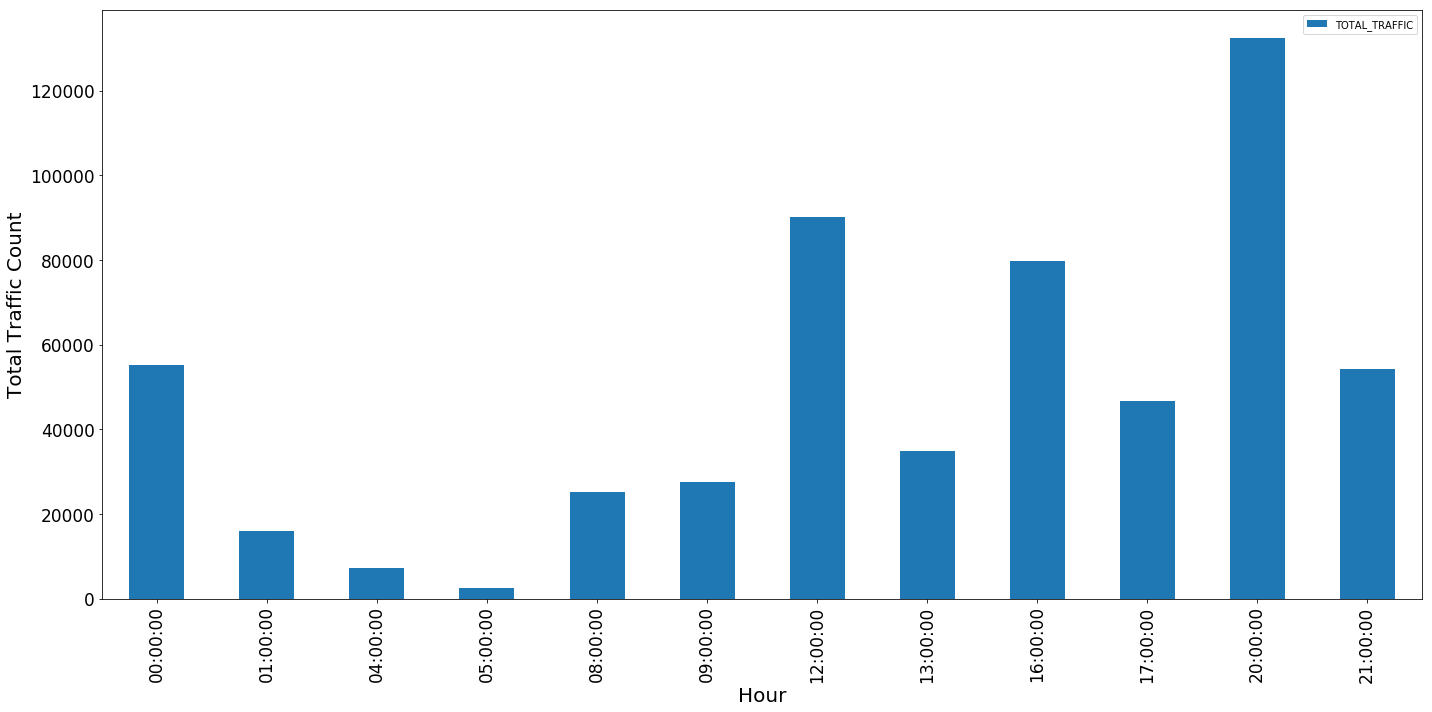

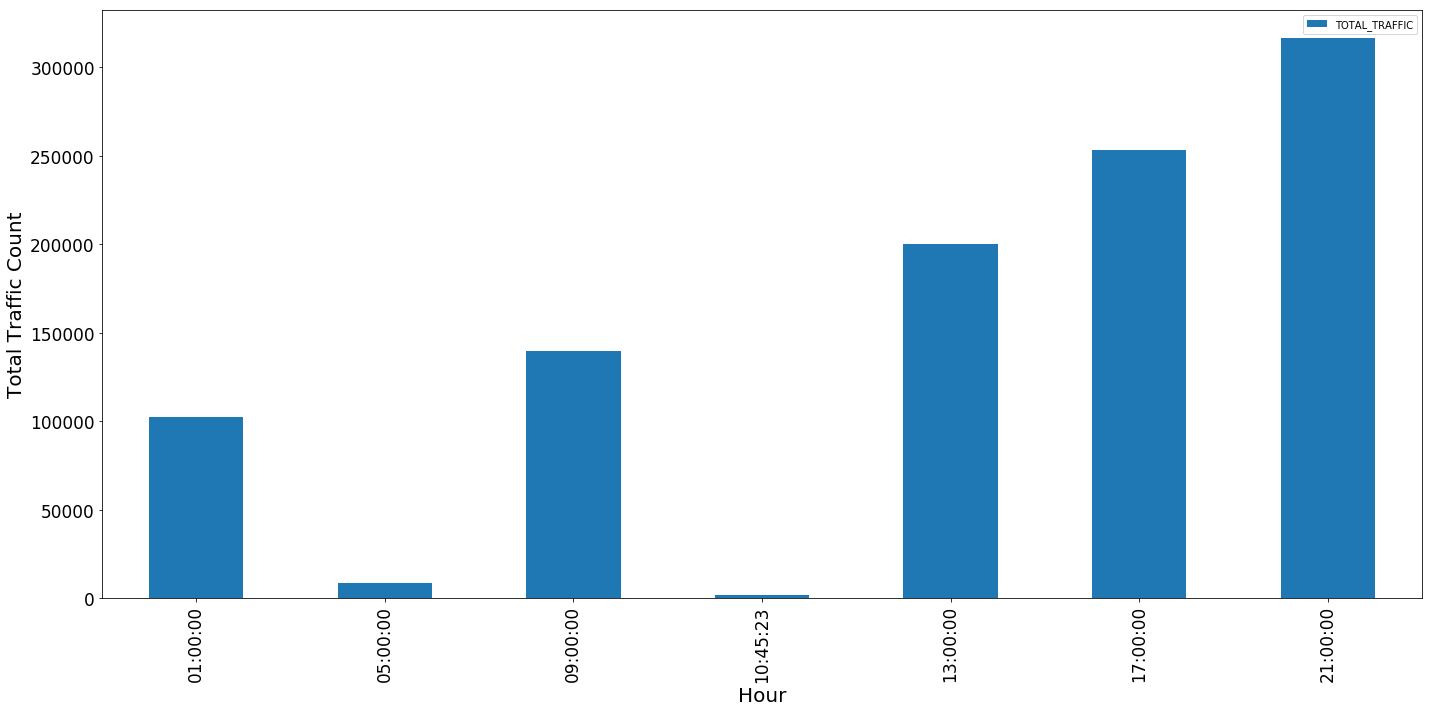

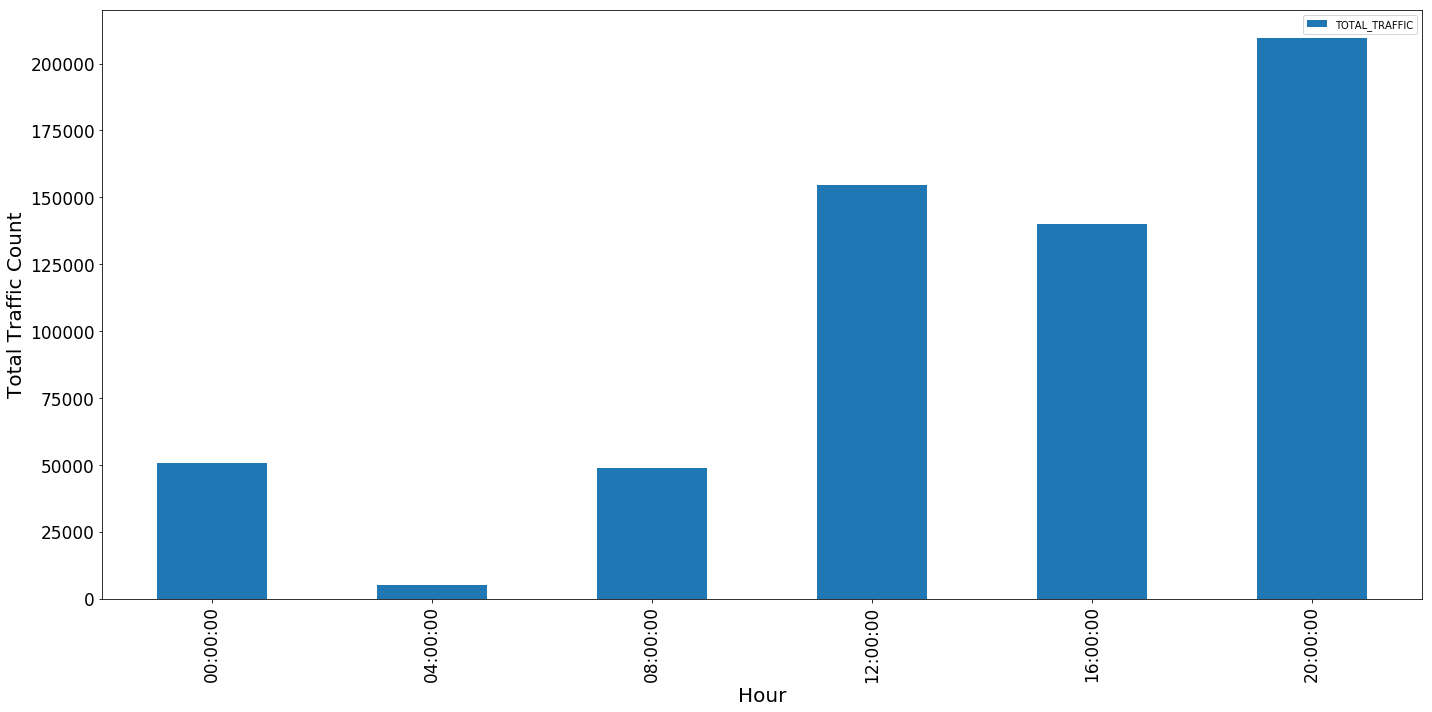

In [120]:
#creating Thursday hourly charts for stations of interest 
stations_of_interest = ['34 ST-PENN STA', 'LEXINGTON AV/53', '14 ST', '14 ST-UNION SQ', 'CHAMBERS ST']
for station in stations_of_interest:
    station_df = df[df["STATION"] == station]
    station_dow = station_df.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
    
    station_thursday = station_df[station_df["day_of_week"] == 'Thursday']
    station_thursday_hours = station_thursday.groupby(["TIME"]).agg({'TOTAL_TRAFFIC': 'sum'})
    
    ax = station_thursday_hours.plot.bar(figsize=(20,10))
    ax.set_ylabel("Total Traffic Count", fontsize = 20)
    ax.set_xlabel("Hour", fontsize = 20)
    ax.tick_params(axis = "both", which = "major", labelsize= 17)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(''.join((''.join(station.split( )).split('/')))+'THISONEhours.png')